# Model Persistence (Adult dataset)

In this notebook we will be going to learn model persistence with Adultdata dataset using pickle library of python. We will answer the questions such as: What is model persistence?; When it is used? and Why we use a particular method?

## When do we need model persistence?

Consider these Machine Learning (ML) use cases:  
* A data scientist produces an ML model and hands it over to an engineering team for deployment in a production environment.  
* A data engineer integrates a model training workflow in Python with a model serving workflow in Java.  
* A data scientist creates jobs to train many ML models, to be saved and evaluated later.

All of these use cases are easier with **model persistence**, the ability to save and load models.

## What is model persistence?

Finding an accurate machine learning model is not the end of the project. Model persistence allows you to save your model to ﬁle and load it later in order to make predictions. There are number of ways through which we can save and load our data, such as:

* pickle
* cPickle
* joblib
* apache thrift
* HDF5

Depending on what you want to save or load you can use the appropriate method.

## Why to use a particular method for model persistence?

Key features of ML persistence method include:

* Support for all language APIs: Scala, Java, Python & R  
* Support for nearly all ML algorithms in the DataFrame-based API  
* Support for single models and full Pipelines, both unfitted (a “recipe”) and fitted (a result)  
* Distributed storage using an exchangeable format

In [1]:
#importing the libraries
import numpy as np
import pandas as pd

The Adultdata.xlsx dataset contains 13 different attributes of an individual such as his/her Workclass, Education, Marital Status, etc. and on target variable. The target variable specifies whether that individuals salary is less than or more than 50K.

### Connecting to dataset through mysql connector

Here we try to create a generalized way to create a *"MySQL"* object and apply different methods to that object in order to load the dataframe.

In [2]:
import mysql.connector

# creating a MySQL object class
class MySQL(object):
    
    cursor = None
    def __init__(self):
        pass

    # func. to connect to the the dataset; returning cursor
    def connect(self, host, username, password, db, ds):
        self.connection = mysql.connector.connect(host=host, database=db, user=username, password=password)
        MySQL.cursor = self.connection.cursor()
        MySQL.cursor.execute('SELECT * FROM ' + db + '.' + ds)
        return self.cursor

    #func. to lead the dataset into pandas dataframe
    def dataset(self, cursor):

        df = pd.DataFrame(MySQL.cursor.fetchall())
        return df

    #func.  which returns a list of column headings
    def get_columns(self, param):
        if not MySQL.cursor:
            MySQL.connect(self, host=param["host"], username=param["username"],
                          password=param["password"], db=param["db"], ds = param['ds'])
        a = self.cursor.column_names
        return a

### Loading the dataframe

In [3]:
# The credentials required for Adultdata dataset
param = {"host" : "192.168.1.11", "username" : "root", "password" : "", "db": "cs", "ds":"adultdatasetSQL_1526547134645 a;"}

# Creating a MySQL object
data = MySQL()

l = data.get_columns(param)
print(l)

('Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target')


In [4]:
# loading the dataset into a dataframe named 'df'.
df = data.dataset(data.connect("192.168.1.11",  "root", "", "cs", "adultdatasetSQL_1526547134645 a;"))
df.columns = l
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,Stategov,77516,Bachelors,13,Nevermarried,Admclerical,Notinfamily,White,Male,2174,0,40,UnitedStates,1
1,50,Selfempnotinc,83311,Bachelors,13,Marriedcivspouse,Execmanagerial,Husband,White,Male,0,0,13,UnitedStates,1
2,38,Private,215646,HSgrad,9,Divorced,Handlerscleaners,Notinfamily,White,Male,0,0,40,UnitedStates,1
3,53,Private,234721,11th,7,Marriedcivspouse,Handlerscleaners,Husband,Black,Male,0,0,40,UnitedStates,1
4,28,Private,338409,Bachelors,13,Marriedcivspouse,Profspecialty,Wife,Black,Female,0,0,40,Cuba,1


In [5]:
# finding and removing missing data
df = df.replace(' ?', np.nan)
df.dropna()
print(df.shape)

(19601, 15)


In [6]:
# Understanding the data with decriptive statistics.
df[['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']].describe()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country,Target
count,19601,19601,19601,19601,19601,19601,19601,19601,19601
unique,9,16,7,15,6,5,4,41,2
top,Private,HSgrad,Marriedcivspouse,Profspecialty,Husband,White,Male,UnitedStates,1
freq,13630,6407,8974,2502,7876,16787,13102,17540,14923


### Converting features into categorical variables and coding

For deploying machine learning classification algorithms it is necessary to transform the string lists into categorical variables. We can then form integer codes from those qualitative categorical variables which are better understood by the classifier.

In [7]:
features = ['Workclass', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

for column in features:
    df[column] = df[column].astype("category").cat.codes

In [8]:
# Deleting unnecessary features can save both time and effort.
df.drop(['Education', 'Capital_Gain', 'Capital_Loss'], axis = 1, inplace = True)
df.head()

,Age,Workclass,fnlwgt,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Target
0,39,7,77516,13,4,1,1,4,3,40,38,1
1,50,6,83311,13,2,4,0,4,3,13,38,1
2,38,4,215646,9,0,6,1,4,3,40,38,1
3,53,4,234721,7,2,6,0,2,3,40,38,1
4,28,4,338409,13,2,10,5,2,2,40,5,1


Our predictor variables are the first 11 parameters and the target variable is the last parameters which determine whether the salary of a person is less than or more than 50K. 

It is necessary to create separate *nd arrays* for predictor and target variables in order to train them on different statistical learning algorithms using *sklearn* library

In [9]:
#converting the dataset into predictor and target arrays
array = df.values
X = array[:, 0:11]
Y = array[:, 11]

In [10]:
from sklearn.ensemble import RandomForestClassifier

# using random selection on 3 features and classification with 100 trees
model = RandomForestClassifier(n_estimators= 2000, max_depth = 10, min_samples_split = 10, min_samples_leaf = 1,
                                    bootstrap = True, random_state = 42)

In [11]:
from sklearn.model_selection import train_test_split

# Using train_test_split to split the data to training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
# testing the model with test split
result = model.score(X_test, Y_test) 
print("Accuracy: ", (result*100.0))

Accuracy:  84.0160766734


The fitted model is giving the accuracy of 84%.

## Comparing model persistence through Pickle and Joblib

We used pickle and joblib libraries of Python 3.x to save our trained Random Forests Model in case we need it to predict results in future. These two are the most commonly used libraries to save dataframe based models.

### Pickle

Pickle is the standard way of serializing objects in Python. We used the pickle operation to serialize our machine learning algorithms and save the serialized format to a ﬁle. Later we can load this ﬁle to deserialize our model and use it to make new predictions. The advantage of using pickle is that it can serialize pretty much any Python object, without having to add any extra code. Its also smart in that in will only write out any single object once, making it effective to store recursive structures like graphs. 

### Joblib

The Joblib2 library is part of the SciPy ecosystem and provides utilities for pipelining Python jobs. It provides utilities for saving and loading Python objects that make use of NumPy data structures, eﬃciently3. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors).

In [13]:
# importing the necessary libraries
import pickle
from sklearn.externals import joblib

filename = 'finalized_model.sav' 

# using the magic fuction "%timeit" to estimate execution time.
# saving the execution time 'pickle.dump() through '-o' command
result = %timeit -o pickle.dump(model, open(filename, 'wb'))
print(result.best)

# saving the execution time of 'joblib.dump()'
result2 = %timeit -o joblib.dump(model, filename)
print(result2.best)

1.12 s ± 374 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.8432074401543281
1.13 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.025578374946594


In [14]:
# saving the Random Forests model through pickle and joblib respectively
pickle.dump(model, open('finalized_model1.sav', 'wb'))
joblib.dump(model, 'finalized_model2.sav')

import os

# locating the pickle saved model file and getting it's size
file1 = 'C:/Users/hp/finalized_model1.sav'
file_size1 = os.path.getsize(file1)/(1024*1024.0)
print(file_size1, "mb")

# locating the joblib saved model file and getting it's size
file2 = 'C:/Users/hp/finalized_model2.sav'
file_size2 = os.path.getsize(file2)/(1024*1024.0)
print(file_size2, "mb")

81.64986324310303 mb
81.55475807189941 mb


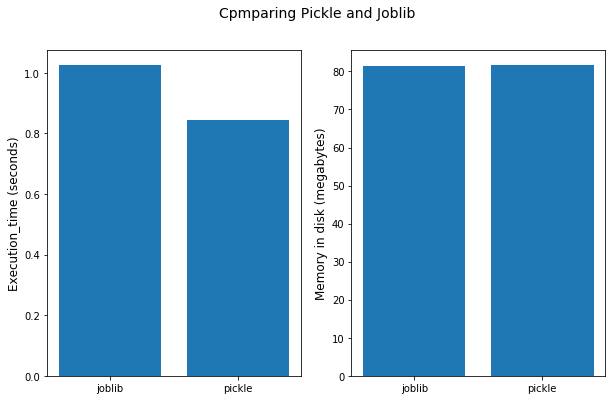

In [15]:
# plotting the execution time and memory used on disk
# for pickle and joblib model
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_subplot(121)
ax1.bar(['pickle', 'joblib'], [result.best, result2.best])

ax2 = fig.add_subplot(122)
ax2.bar(['pickle', 'joblib'], [file_size1, file_size2])

ax1.set_ylabel('Execution_time (seconds)', size = 12)
ax2.set_ylabel('Memory in disk (megabytes)', size = 12)

plt.suptitle('Cpmparing Pickle and Joblib', size = 14)

plt.show()

The above results shows:  
1. Joblib is taking more time to store the model.
2. Both pickle and joblib saved files consumes nearly same space on the disk

### Some problems in using pickle
* Pickle is both slower and produces larger serialized values than most of the alternatives.  
* Pickle is a security risk. Another reason not to use pickle is that unpickling malicious data can cause security issues, including arbitrary code execution.  

## Alternative to pickle:

If we want to store large amounts of data that we need to quick access to our standard text file isn’t going to cut it. The kinds of cosmological simulations that we run generate huge amounts of data, and to analyse them we need to be able access the exact data that we want quickly and painlessly.

HDF5 is one answer. It’s a powerful binary data format with no upper limit on the file size. It provides parallel IO, and carries out a bunch of low level optimisations under the hood to make queries faster and storage requirements smaller.

#### We can save the following attributes of random forests as hdf5 file and use them to fit our model again:  

**estimators_**: It is a list of fitted DecisionTressClassifiers/sub-estimators

**classes_**: It is an array containing classes labels, or a list of arrays of class labels (multi-output problem).

**nclasses_:** It is the number of classes, or a list containing the number of classes for each output (multi-output problem).

**noutputs_**: It is an integer giving the number of outputs when 'fit' is performed.

**For example:** Some days later we need to predict results with our previously trained Random Forests Model named "model". We can used the saved model attributes in the new model with same optimized parameters to get the same results. We will name our new model as "model2"


In [16]:
model2 = RandomForestClassifier(n_estimators=2000, max_depth = 10, min_samples_split = 10, min_samples_leaf = 1,
                                    bootstrap = True, random_state = 42)

In [17]:
attributes = ['estimators_', 'classes_', 'n_classes_', 'n_features_', 'n_outputs_', 'feature_importances_']

model2.estimators_ = model.estimators_
model2.classes_ = model.classes_
model2.n_classes_ = model.n_classes_
model2.n_outputs_ = model.n_outputs_

In [18]:
result = model2.score(X_test, Y_test) 
print("Accuracy: ", (result*100.0))

Accuracy:  84.0160766734


The results the generated by *model2* are exactly the same generated by *model*